# **ICS 4102: ML Group Final Task**
---
#### Group Members (ICS 4B): 
1.   Young Israel Izere - 113000
2.   Aganze Mwaza Eric - 112172
3.   Jeffrey King’ori - 103673
4.   Gloria Muthumbi - 110596
---
#### Task: **Twitter Sentiment Analysis** 
> A sentiment analyzer which identifies tweets sentiments: either positive or negative (*binary classification*).
---
**Dataset source:** http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip 

By developing a neural network using TensorFlow, a sentimental analyzer was built to overcome the obstacles of identifying the text sentiments (positive, negative) in Twitter tweets.

**Rationale**: Sentiment analysis divides emotions into positive and negative categories. Sentimental analysis is critical because we can learn about people's emotions on specific topics by looking at their tweets.

# Importing Libraries and Loading Dataset

**Importing the libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**The libraries**

* The ‘Pandas’ library is a python library for data frame and time series manipulation. We used this library to analyze and pre-process the dataset (analyzing and filtering, displaying and manipulating the data frames).
* The ‘NumPy’ python library was used for matrices manipulations, transformations and array computations. Operations on the string matrices was made possible using ‘NumPy’.
* Seaborn was used to create visualizations. Seaborn isb based on matplotlib. Seaborn aided in regards to data exploration and comprehension.

* pyplot was used as a plotting library for the 2D graphics.
* The sklearn library was used for classification, feature extraction, classification report and confusion matrix computation, train test split using 'model_selection'
* The Natural Language Toolkit (NLTK) was used for text processing - tokenization, parsing, stemming, PorterStemmer, stopwords.
* 'plot_confusion_matrix' was used to plot the confusion matrix
* Matplotlib was used for rcParams, builtin colormaps, colormap handling utilities.
* Counter from Collections was used for counting hashable objects.
* RegexpTokenizer from nltk.tokenize was used to splits string into substrings using a regular expression.
* The regular expression (re) library was used to check particular string matches a the text dataset.
* The string library was used for a number of functions in regards to processing word strings.
* tensorflow.keras.layers was used to train our sentiment analysis model. It was used to structure the neural network architecture, sequence, tokenization, layers structire set up, RMSprop optimizer, LSTM, Activation, Dense and layer dropout, as well as word embeddings processing.
* The warnings library were used in this notebbok as a way of to warn exceptions or any situations that aren't necessarily exceptions in throughout the development testing process of our sentiment analysis model.

By receiving inputs from the Flatten layer, the dense layer reduces the outputs. All of the preceding layer neurons' inputs are used by the dense layer, which performs calculations and sends outputs.

Our activation function assisted in determining which neurons should be passed and which should fire. As a result, the node's activation function describes the output of that node given an input or group of inputs.

Words and their respective meanings are presented using embeddings.

The LSTM algorithm predicts the next words in a series. Some neurons from previous layers are dropped in the dropout layer to avoid overfitting which would caused the model to providing strong training time accuracy but poor testing time accuracy.

**The process:**

This Sentiment Analysis Model is based on TensorFlow. We took the Sentiment dataset and divided it into 70 percent training data and 30 percent testing data. We analyze the model after it has been trained to assess its performance using an accuracy metric as well as a confusion matrix for this classification model.

**Key points:**

The labels:
In this project, the labels were the targets - the sentiment of the tweets were labels.
The inputs: In this project, the inputs are tweets and sentences, which we fed into the machine learning.
When we were training the models, we used training data. We feed train data into our machine learning model so that it can learn from it.
Data from the tests
After training the model, we used testing data. We used this information to assess the model's performance after training. So, first, we acquire predictions from the trained model without providing labels, and then we compare the genuine labels to the predictions to determine the model's performance.

**Loading the dataset** 

In [ ]:
data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', engine='python')

# Selecting columns which are relevant to our task
data.columns = ["label", "time", "date", "query", "username", "text"]

**Exploratory Analysis**

First five rows

In [ ]:
data.head()

,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


Last five rows

In [ ]:
data.tail()

Shape of data

In [ ]:
data.shape

(1599999, 6)

Data information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1599999 non-null  int64 
 1   time      1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   query     1599999 non-null  object
 4   username  1599999 non-null  object
 5   text      1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


Chacking data for null values

In [ ]:
np.sum(data.isnull().any(axis=1))

0

# Preparing the Dataset

Selecting the text and label column

In [ ]:
data=data[['text','label']]

Assigning 1 to positive sentiment 4

In [ ]:
data['label'][data['label']==4]=1

Separating positive and negative tweets

In [ ]:
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

Taking part of our data (40,000) so we can run on colab easily

In [ ]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

Combining positive and negative tweets

In [ ]:
data = pd.concat([data_pos, data_neg])

In [ ]:
data.shape

(40000, 2)

**Data cleaning**

Making statement text lower case

In [ ]:
data['text'] = data['text'].str.lower()

Removing stop words

In [ ]:
import nltk
nltk.download('stopwords')
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
stopword_list = stopwords.words('english')


In [ ]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

799999                love @health4uandpets u guys r best!!
800000    im meeting one besties tonight! cant wait!! - ...
800001    @darealsunisakim thanks twitter add, sunisa! g...
800002    sick really cheap hurts much eat real food plu...
800003                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

Removing punctuations

In [ ]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
  translator = str.maketrans('','',punctuations_list)
  return text.translate(translator)

In [ ]:
data['text'] = data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()

19995                                     one day holidays
19996                     feeling right  hate damn humprey
19997    geezi hv read whole book personality types emb...
19998     threw sign donnie bent get thingee made sad face
19999    heather2711 good thing find none ones like com...
Name: text, dtype: object

Removing repreating characters

In [ ]:
def cleaning_repeating_chars(text):
  return re.sub(r'(.)\1+', r'\1', text)


In [ ]:
data['text'] = data['text'].apply(lambda x: cleaning_repeating_chars(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

Removing emails

In [ ]:
def cleaning_email(data):
  return re.sub('@[^\s]+', ' ', data)

In [ ]:
data['text'] = data['text'].apply(lambda x: cleaning_email(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

Removing URLs

In [ ]:
def cleaning_URLs(data):
  return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [ ]:
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

Cleaning and removing numeric numbers

In [ ]:
def cleaning_numbers(data):
  return re.sub('[0-9]+', '', data)

In [ ]:
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather god thing find none ones like come siz...
Name: text, dtype: object

**Getting tokenization of tweet text** to separate the tweet into words.

In [ ]:

tokenizer = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)
data.head()

,text,label
799999,"[love, healthuandpets, u, guys, r, best]",1
800000,"[im, meting, one, besties, tonight, cant, wait...",1
800001,"[darealsunisakim, thanks, twiter, ad, sunisa, ...",1
800002,"[sick, realy, cheap, hurts, much, eat, real, f...",1
800003,"[lovesbroklyn, efect, everyone]",1


Visualization of the most appearing words

In [ ]:
from wordcloud import WordCloud


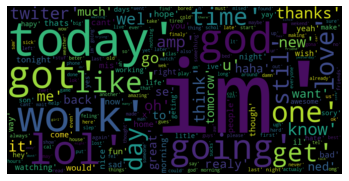

In [ ]:
# Visualization  ---- Plot the word Cloud, to see which words appear the most
allwords = ' '.join([str(twts) for twts in data['text']])
wordCloud = WordCloud(width = 1000, height = 500, random_state = 40, max_font_size = 300).generate(allwords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

**Applying stemming** to produce a word's stem: reducing it to it base/root word.

In [ ]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
  text = [st.stem(word) for word in data]
  return data

In [ ]:
data['text'] = data['text'].apply(lambda x: stemming_on_text(x))
data['text'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

# Training the model

**Separating the input features and labels**

In [ ]:
X=data.text
y=data.label

**Preparing input features for training**
* Converting words into array form.
* Maximum 500 features/words selected for training. These 500 words will be selected on the importance that will distinguish between positive tweets and negative tweets.

In [ ]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

Separating training and testing data (70% for training, 30% for testing)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

**Building the deep model using Tensorflow**

In [ ]:
def tensorflow_based_model(): #Defined tensorflow_based_model function for training tenforflow based model
    #The input to the model is 500 words.
    inputs = Input(name='inputs',shape=[max_len])
    #Embedding
    layer = Embedding(2000,50,input_length=max_len)(inputs)
    #long short term memory
    layer = LSTM(64)(layer)
    #Dense Layer
    layer = Dense(256,name='FC1')(layer)
    #Activation function
    layer = Activation('relu')(layer)
    #Dropout layer
    layer = Dropout(0.5)(layer)
    #Dense layer again but this time its giving only one output as because we need to classify the tweet as positive or negative
    layer = Dense(1,name='out_layer')(layer)
    #Activation function but this time activation function is sigmoid for only one output.
    layer = Activation('sigmoid')(layer)
    #here we are getting the final output value in the model for classification
    model = Model(inputs=inputs,outputs=layer) 
    return model #function returning the value when we call it

**Model Compilation**

In [ ]:
model = tensorflow_based_model()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

**Training and Validating with parameter tuning**

Feeding the training data and getting 10% data for validation from training data.


We could choose batch size and epochs, as well as specify some values and train the model. If the model did not produce high accuracy, we could tweak it and try again. As part of the parameter tuning process, we may repeat this approach if we didn't receive good results.

In [ ]:
history=model.fit(X_train,Y_train,batch_size=80,epochs=1, validation_split=0.1)
print('Training finished !!')

315/315 [==============================] - 128s 400ms/step - loss: 0.5747 - accuracy: 0.6952 - val_loss: 0.5235 - val_accuracy: 0.7325
Training finished !!


**Test the trained model on test data**

In [ ]:
accr1 = model.evaluate(X_test,Y_test)

375/375 [==============================] - 25s 66ms/step - loss: 0.5244 - accuracy: 0.7317


In [ ]:
#Accuracy
print('Test set \n Accuracy: {:0.2f}'.format(accr1[1]))

Test set 
 Accuracy: 0.73


**About accuracy:**

The number of accurately classified tweets from all positive and negative tweets is known as accuracy. The accuracy score will be 70% if the trained model classifies 70 tweets correctly and 30 tweets incorrectly out of a total of 100 tweets.
Total number of right predictions divided by total number of predictions equals accuracy.

We used “binary crossentropy” because we only used two classes; if we had used more than two classes, we would have used “categorical crossentropy.”
The optimizer is a function that was used to minimise losses by changing the features of the neural network, such as learning rate (how the model learns with features). As a result, the optimizer determined the learning rate of the neural networks in order to minimise the losses.
Because we were going to calculate the percentage of right predictions on the validation set, we chose accuracy as our metric.

**Getting prediction on the trained model**

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

Confusion matrix

[[4468 1541]
 [1679 4312]]




<function matplotlib.pyplot.show>

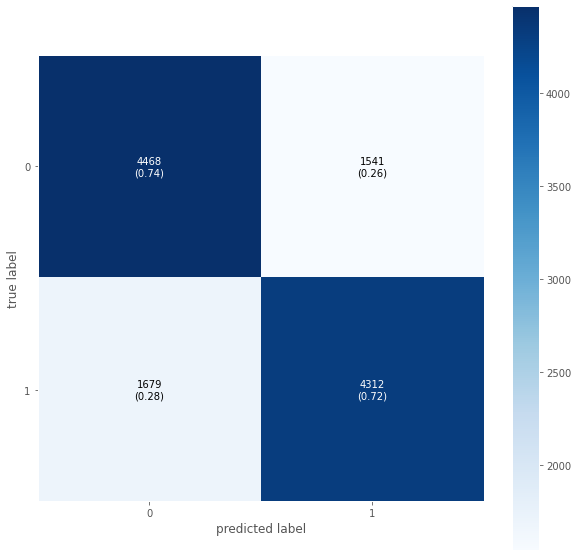

In [ ]:
CR = confusion_matrix(Y_test, y_pred)
print(CR)

print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR, 
                                figsize=(10,10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

plt.show



In the above Confusion matrix, dark blue boxes are the correct predictions with the trained model and sky blue boxes show the wrong predictions.
(0 - negative, 1 - positive).

**Results**:

Negative sentiments were successfully predicted in 4468 tweets. Positive sentiments were predicted in 1541 tweets, however they were actually negative sentiments.
Positive sentiments were successfully predicted in 4312 tweets. Negative sentiments were expected in 1679 tweets, however they were actually positive ones.

# Conclusion

The Twitter sentiment analysis dataset was used, and the data was prepared in a variety of methods. We worked on the classification problem, which we refer to as binary classification because it has two classes. We cleaned up the text data from tweets by deleting any extraneous information. Furthermore, the model was trained using all settings in TensorFlow. Finally, the model was assessed using various evaluation criteria.